## ColourMap 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class ColourMap:
    
    def __init__(self, inputnodes,matrixDim,learningrate):
        
        self.inodes = inputnodes
        self.onodes = matrixDim[0]*matrixDim[1]
        self.maxRow = matrixDim[0]
        self.maxCol = matrixDim[1]
        self.lr     = learningrate
        
        self.wio    = np.random.rand(self.inodes,self.onodes)
#         self.wio = np.random.normal(0.0, pow(self.inodes, -0.5), (self.inodes, self.onodes)) 
                
        pass
                     
        
    def errorMag(self,xn):
        
        #Initialise a zero matrix of same shape as the weight matrix
        e = np.zeros_like(self.wio)  
        
        # Find the difference between input and corresponding weight for each output neuron
        for k in range(self.onodes):
            e.T[k] = np.subtract(xn,self.wio.T[k])
        
        # Append a row to array e to store squared sum of errors for each neuron
        e = np.append(e, np.zeros((1,self.onodes)), axis=0)    
        
        # Find least squared error for each output neuron
        for col in range(self.onodes):
            SquareSum = 0
            for row in range(self.inodes):
                SquareSum += np.square(e[row][col])
            e[row+1][col] = SquareSum   
        
        # Return last row of array e, which contains Squared Error sum,corresponding to each o/p neuron
        return e[len(e)-1]

    
    def Neighbourhood(self,winnerIndex,i,j):
        
        distance = np.square(winnerIndex[0]-i) + np.square(winnerIndex[1]-j)
        distance = np.sqrt(distance)
#         print(i,j,distance)
        
        if distance == 0:                                # R = 0
            return 1.0
        elif (distance == np.sqrt(2) or distance == 1):  # R = 1
            return 0.5
        elif (distance == np.sqrt(8) or distance == 2):  # R = 2
            return 0.25
        else:
            return 0
        
    pass    
        
        
    def WeightUpdate(self,winner,xn,R):
        
#       Create a array of zeros similar to weights to store delta_w
        delta_wio = np.zeros_like(self.wio)

    
#       Get the row and column indices of the winner in 50x50 matrix  
#       0 --> RowIndex   1 --> ColumnIndex for winner,left and right neurons
        
        winnerIndex = np.array([0,0])
                
        winnerIndex[0] = winner % self.maxRow
        winnerIndex[1] = np.floor(winner/self.maxCol)
        
#         self.winnerIndex = winnerIndex
        
        leftNeuronIndex = (winnerIndex - R) % self.maxRow
        rightNeuronIndex = (winnerIndex + R) % self.maxRow     
        
        
#         For non-modular update, LeftNeuron < WinningNeuron < RightNeuron

        for i in range(2):
        
            if(leftNeuronIndex[i] > winnerIndex[i]):
                leftNeuronIndex[i] = winnerIndex[i]                
                
            elif(rightNeuronIndex[i] < winnerIndex[i]):
                rightNeuronIndex[i] = winnerIndex[i]       
         
#           print(leftNeuronIndex,winnerIndex,rightNeuronIndex)
         
        
#     Update the weights
             
        for i in range(leftNeuronIndex[0],rightNeuronIndex[0]+1):
            for j in range(leftNeuronIndex[1],rightNeuronIndex[1]+1):
                
#                 Get neuron number from its indices
                k = i + (j*self.maxRow)
                delta_wio.T[k] = self.lr * self.Neighbourhood(winnerIndex,i,j) * np.subtract(xn,self.wio.T[k])          
            
        return delta_wio    
             

    def train(self,inputs,epochs=10):
        
        self.R = 1
            
        for epochIndex in range(epochs):
            
            print('Epoch = ',str(epochIndex+1))
            for i in range(len(inputs[0])): 
                
                # find the SumSquareError between input and w[n]
                error = self.errorMag(inputs.T[i])

                #find the index of the winning neuron, one with least square error
                winningNeuron = np.argmin(error)

                # Update the weigths of winningNeuron and neighbourhood
                dw = self.WeightUpdate(winningNeuron,inputs.T[i],self.R)

                #Add delta_w to weights
                self.wio = np.add(self.wio,dw)
                
                dw = np.sort(dw, axis=None)
#                 print('Minimum dw :' + str(dw[np.argmin(dw)]))
                
                self.colourmap = self.wio.T.reshape(self.maxRow,self.maxCol,3)
                
                plt.imshow(self.colourmap)
                plt.show()   

    pass



### For better visualisation, 10X10 matrix is used instead of 50X50 

In [3]:
A = ColourMap(3,[10,10],0.5)

In [4]:
x = np.random.rand(3,15)

Epoch =  1


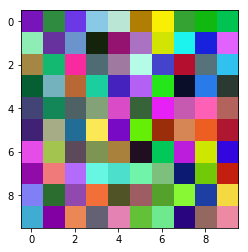

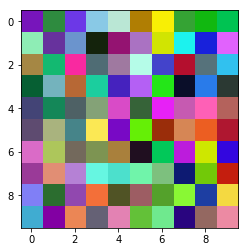

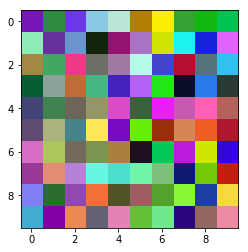

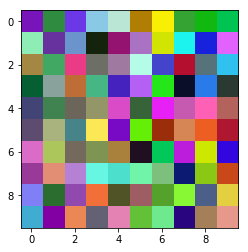

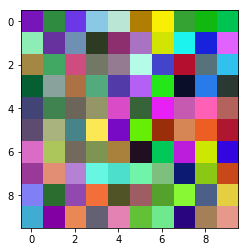

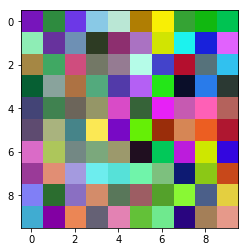

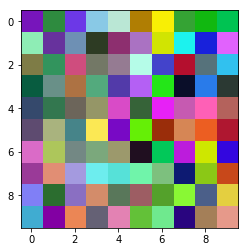

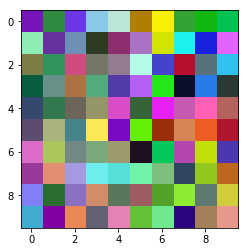

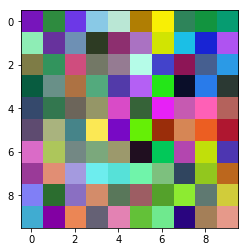

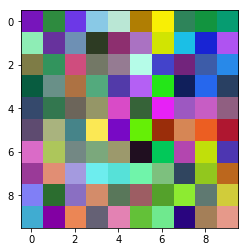

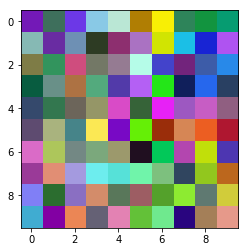

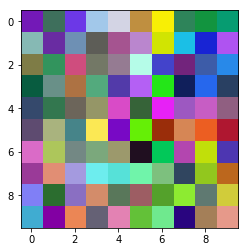

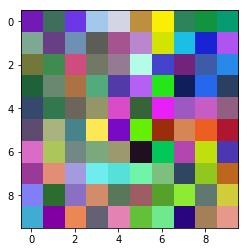

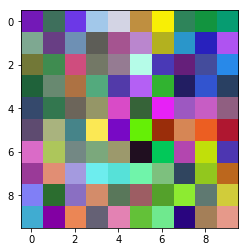

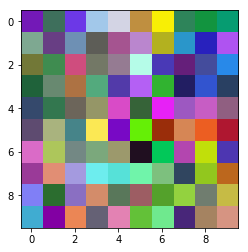

Epoch =  2


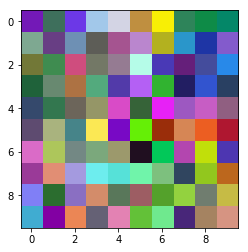

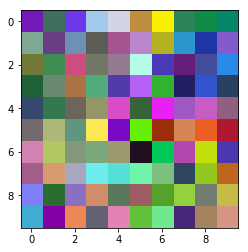

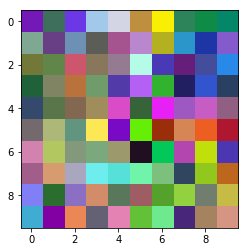

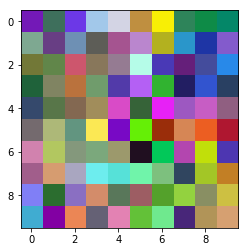

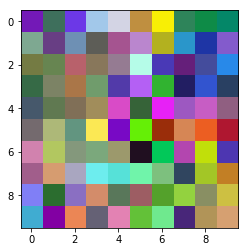

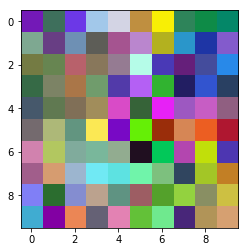

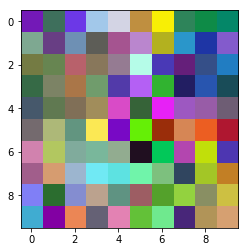

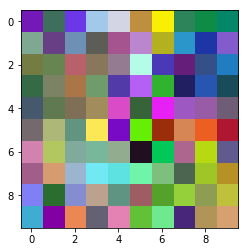

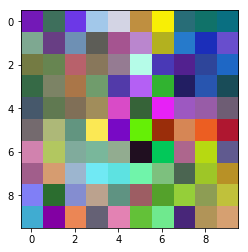

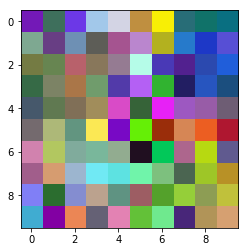

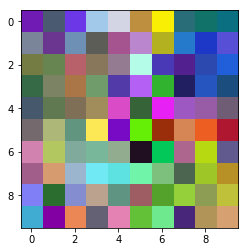

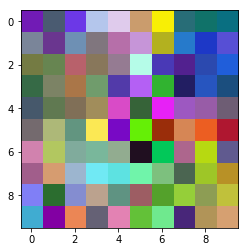

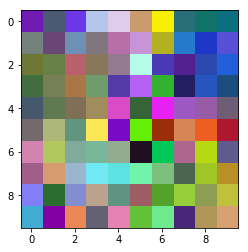

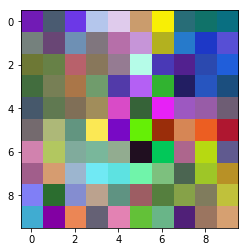

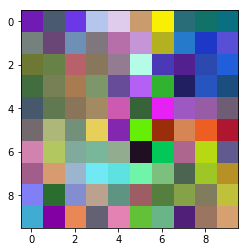

Epoch =  3


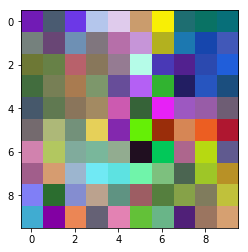

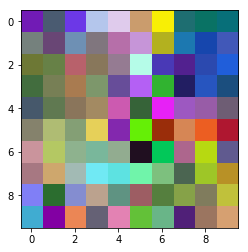

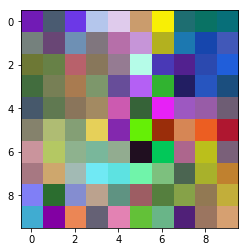

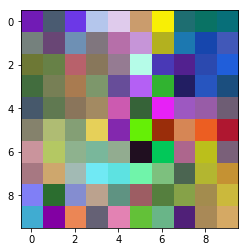

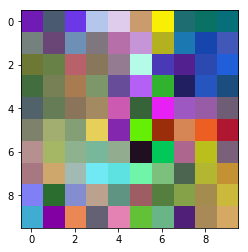

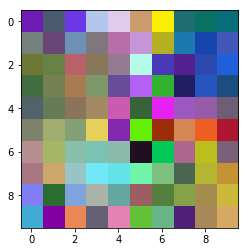

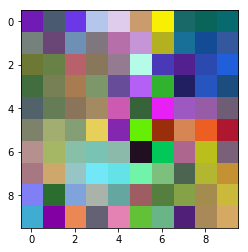

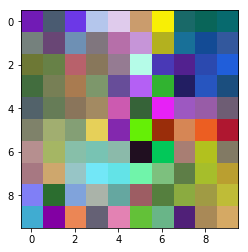

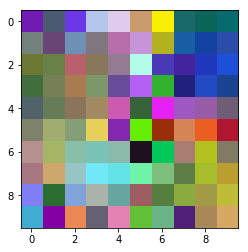

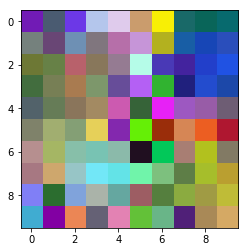

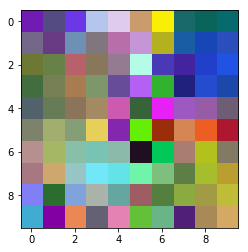

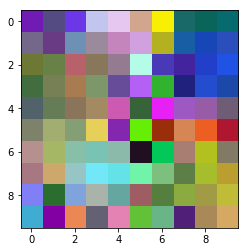

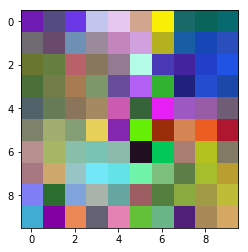

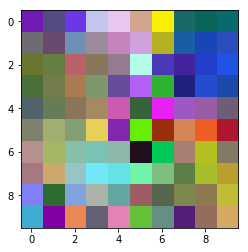

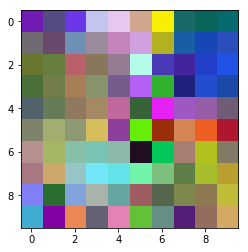

Epoch =  4


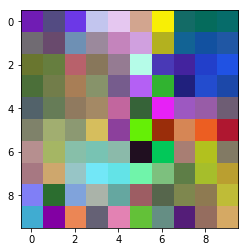

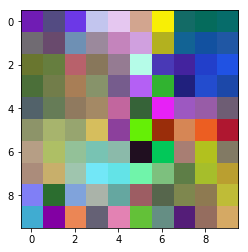

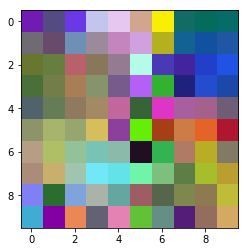

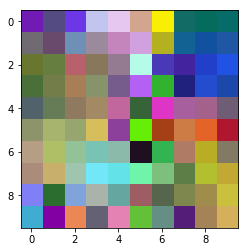

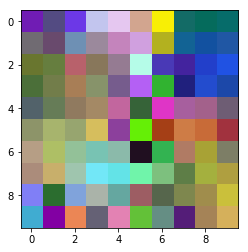

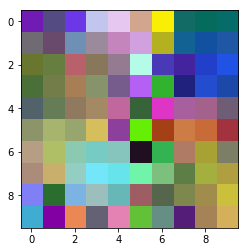

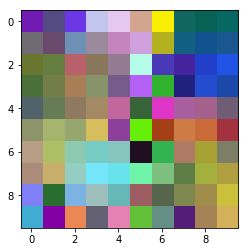

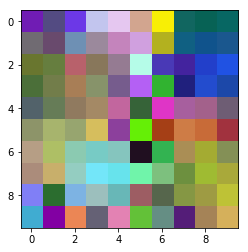

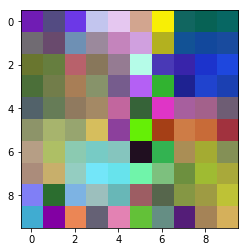

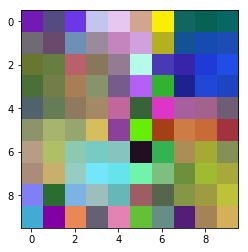

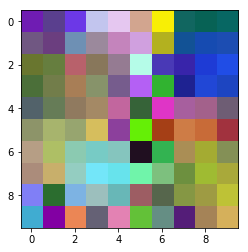

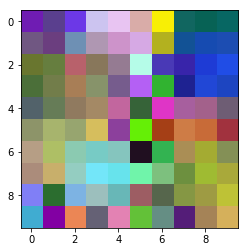

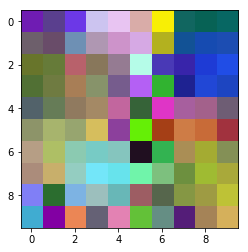

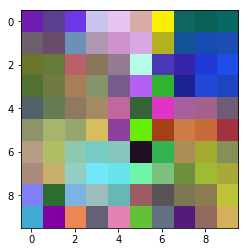

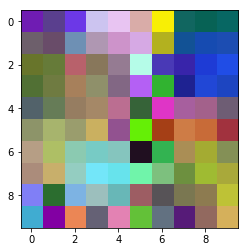

Epoch =  5


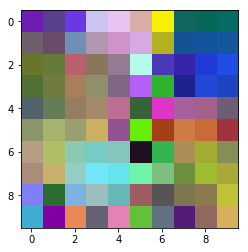

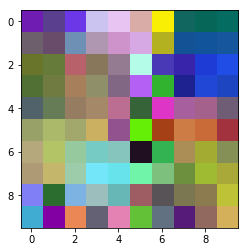

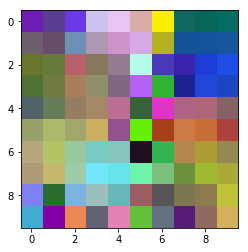

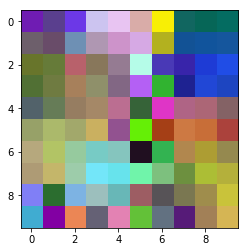

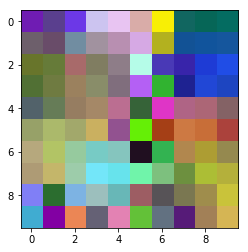

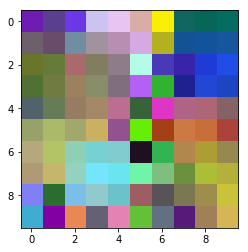

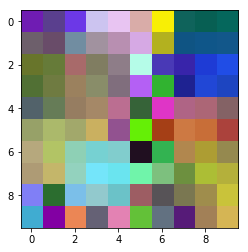

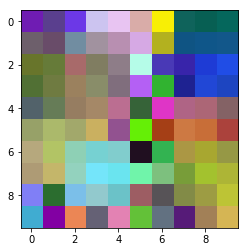

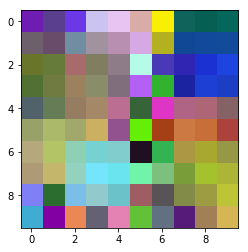

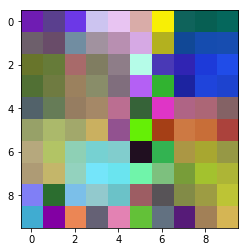

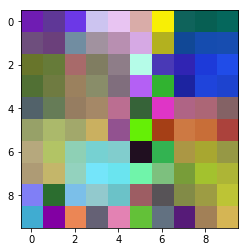

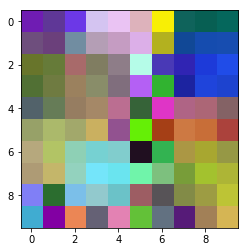

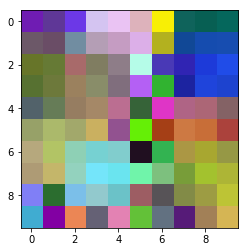

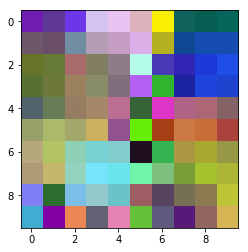

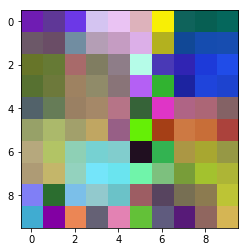

In [5]:
A.train(x,5)

# Final Result

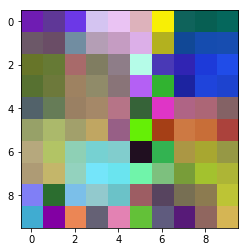

In [6]:
plt.imshow(A.colourmap)